In [3]:
from __future__ import print_function
import sys, os, math
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
sns.set_context('talk')
import malis

In [4]:
# Load PyGreentea
# Relative path to where PyGreentea resides
pygt_path = '/groups/turaga/home/turagas/research/caffe_v1/PyGreentea'
sys.path.append(pygt_path)
import PyGreentea as pygt

cmap = matplotlib.colors.ListedColormap(np.vstack(((0,0,0),np.random.rand(255,3))))

In [5]:
# Load the datasets
raw_h5_fname = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/img_normalized.h5'
gt_h5_fname = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
aff_h5_fname = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_aff.h5'
testeu_h5_fname = 'test_out_0.h5'
test_h5_fname = 'test_out_0.h5'

raw_h5f = h5py.File(raw_h5_fname,'r')
gt_h5f = h5py.File(gt_h5_fname,'r')
aff_h5f = h5py.File(aff_h5_fname,'r')
testeu_h5f = h5py.File(testeu_h5_fname,'r')
test_h5f = h5py.File(test_h5_fname,'r')

raw = raw_h5f['main']
gt = gt_h5f['main']
aff = aff_h5f['main']
testeu = testeu_h5f['main']
test = test_h5f['main']

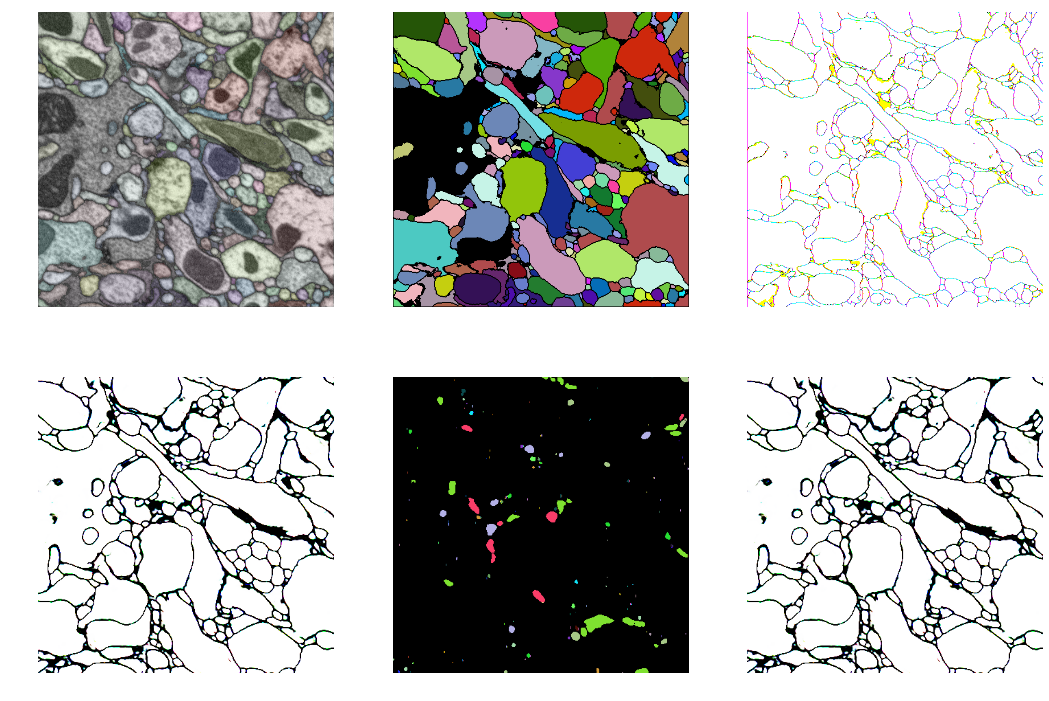

In [35]:
nhood = malis.mknhood3d()
seg,segSizes = malis.connected_components_affgraph((test[:]>0.99999997).astype(np.int32),nhood)

z=50; offset=44
plt.rcParams['figure.figsize'] = (18.0, 12.0)

raw_slc=np.transpose(np.squeeze(raw[z+offset,:,:]),(1,0));
gt_slc=np.transpose(np.squeeze(gt[z+offset,:,:]),(1,0))
aff_slc=np.transpose(np.squeeze(aff[:3,z+offset,:,:]),(2,1,0)).astype(np.float)
testeu_slc=np.transpose(np.squeeze(testeu[:3,z,:,:]),(2,1,0))
test_slc=np.transpose(np.squeeze(test[:3,z,:,:]),(2,1,0))
seg_slc=np.transpose(np.squeeze(seg[z,:,:]),(1,0))

plt.rcParams['figure.figsize'] = (18.0, 12.0)

plt.subplot(2,3,1)
plt.axis('off')
plt.imshow(raw_slc,cmap=plt.cm.get_cmap('gray'))

plt.imshow(gt_slc,cmap=cmap,alpha=0.15);


plt.subplot(2,3,2)
plt.axis('off')
plt.imshow(gt_slc,cmap=cmap);

plt.subplot(2,3,3)
plt.axis('off')
plt.imshow(aff_slc,cmap=plt.cm.get_cmap('gray'));

plt.subplot(2,3,4)
plt.axis('off')
plt.imshow(testeu_slc,cmap=plt.cm.get_cmap('gray'));

plt.subplot(2,3,5)
plt.axis('off')
plt.imshow(seg_slc,cmap=cmap);

plt.subplot(2,3,6)
plt.axis('off')
plt.imshow(test_slc,cmap=plt.cm.get_cmap('gray'));

plt.show()

In [34]:
len(segSizes)

0